In [ ]:
!nvidia-smi

Wed Dec 21 11:28:19 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 1. Installation

## MMDetection github
**google mmdetection 검색**
- https://github.com/open-mmlab/mmdetection


## Install 절차
**installation 링크**
- https://github.com/open-mmlab/mmdetection/blob/master/docs/en/get_started.md/#Installation

### Step 1. Install MMCV using MIM.

In [ ]:
!pip3 install openmim
!mim install mmcv-full

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13.0/index.html


### Step 2. Install MMDetection from the source.

In [ ]:
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -e .

Cloning into 'mmdetection'...
remote: Enumerating objects: 33059, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 33059 (delta 26), reused 31 (delta 4), pack-reused 32963
Receiving objects: 100% (33059/33059), 45.01 MiB | 25.20 MiB/s, done.
Resolving deltas: 100% (23358/23358), done.
/content/mmdetection/mmdetection
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmdetection/mmdetection
  Attempting uninstall: mmdet
    Found existing installation: mmdet 2.26.0
    Can't uninstall 'mmdet'. No files were found to uninstall.
  Running setup.py develop for mmdet


### Step 3. Verification

In [ ]:
import mmdet
print(mmdet.__version__)
# Example output: 2.26.0

2.26.0


### Step 4. Inference
- github home에서 Overview of Benchmark and Model Zoo 섹션 확인
- https://github.com/open-mmlab/mmdetection/tree/master/configs/yolo

In [ ]:
!mim download mmdet --config yolov3_mobilenetv2_320_300e_coco --dest .

/usr/local/lib/python3.8/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
processing yolov3_mobilenetv2_320_300e_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MiB 42.0 MB/s eta 0:00:00
Successfully downloaded yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth to /content/mmdetection/mmdetection
Successfully dumped yolov3_mobilenetv2_320_300e_coco.py to /content/mmdetection/mmdetection


In [ ]:
from mmdet.apis import init_detector, inference_detector

config_file = 'yolov3_mobilenetv2_320_300e_coco.py'
checkpoint_file = 'yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth'
model = init_detector(config_file, checkpoint_file, device='cpu')  # or device='cuda:0'
inference_detector(model, 'demo/demo.jpg')

load checkpoint from local path: yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth


[array([[5.12588043e+01, 1.13287682e+02, 6.75582886e+01, 1.32954651e+02,
         5.93155697e-02],
        [5.45404846e+02, 1.11175240e+02, 5.58186951e+02, 1.24366745e+02,
         5.03070764e-02],
        [3.66082550e+02, 1.23854050e+02, 3.81954681e+02, 1.45346939e+02,
         4.83217016e-02],
        [4.92555008e+01, 1.18862122e+02, 6.38435516e+01, 1.42556534e+02,
         4.66164276e-02],
        [5.28772766e+02, 1.10966637e+02, 5.40577209e+02, 1.23876961e+02,
         3.13959159e-02],
        [4.50718292e+02, 1.01557205e+02, 4.62131439e+02, 1.10339996e+02,
         2.94490177e-02],
        [2.09123947e+02, 9.55709305e+01, 2.23539291e+02, 1.06074486e+02,
         2.49082465e-02],
        [3.54278015e+02, 1.14047302e+02, 3.68170349e+02, 1.26227058e+02,
         2.37889364e-02],
        [2.86970093e+02, 1.19910126e+02, 3.04447571e+02, 1.50397385e+02,
         1.87797695e-02],
        [2.17763092e+02, 1.62588058e+02, 4.57619904e+02, 3.39809692e+02,
         1.80730484e-02],
        [1

# Train A Detector on A Customized Dataset
- github의 demo 디렉토리 아래 [MMDet_Tutorial.ipynb](https://github.com/open-mmlab/mmdetection/blob/master/demo/MMDet_Tutorial.ipynb) 파일 참조 

### Oxford Pet Dataset 다운로드
* [The Oxford-IIIT Pet Dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/) 
* Image당 Object가 1개가 있어서 Classification 문제로도 사용됨
* 37개 품종 분류 (품종당 200장 정도 데이터) : Dataset Statistics 확인

In [ ]:
# download the data
# files: images.tar.gz (dataset) and annotations.tar.gz (groundtruth data).
!wget https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
!wget https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz

--2022-12-21 11:28:46--  https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/octet-stream]
Saving to: ‘images.tar.gz’

images.tar.gz       100%[===================>] 755.23M   217MB/s    in 3.5s    

2022-12-21 11:28:50 (213 MB/s) - ‘images.tar.gz’ saved [791918971/791918971]

--2022-12-21 11:28:50--  https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19173078 (18M) [application/octet-stream]
Saving to: ‘annotations.tar.gz’

annotations.tar.gz  100%[===================>]  18.28M  --.-KB/s    in 0.1s    

2022-12-21 1

In [ ]:
# decompress the data
!mkdir ./oxford_pet
!tar -xvf images.tar.gz -C ./oxford_pet
!tar -xvf annotations.tar.gz -C ./oxford_pet

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
annotations/trimaps/._pomeranian_180.png
annotations/trimaps/pomeranian_180.png
annotations/trimaps/._pomeranian_181.png
annotations/trimaps/pomeranian_181.png
annotations/trimaps/._pomeranian_182.png
annotations/trimaps/pomeranian_182.png
annotations/trimaps/._pomeranian_183.png
annotations/trimaps/pomeranian_183.png
annotations/trimaps/._pomeranian_184.png
annotations/trimaps/pomeranian_184.png
annotations/trimaps/._pomeranian_185.png
annotations/trimaps/pomeranian_185.png
annotations/trimaps/._pomeranian_186.png
annotations/trimaps/pomeranian_186.png
annotations/trimaps/._pomeranian_187.png
annotations/trimaps/pomeranian_187.png
annotations/trimaps/._pomeranian_188.png
annotations/trimaps/pomeranian_188.png
annotations/trimaps/._pomeranian_189.png
annotations/trimaps/pomeranian_189.png
annotations/trimaps/._pomeranian_19.png
annotations/trimaps/pomeranian_19.png
annotations/trimaps/._pomeranian_190.png
annotations/trimaps/pomeranian_190.png
annota

### Oxford Pet Dataset의 디렉토리 구조 보기

In [ ]:
# Check the directory structure of the Oxford Pet

# Install tree first
!apt-get -q install tree

Reading package lists...
Building dependency tree...
Reading state information...
tree is already the newest version (1.7.0-5).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [ ]:
!tree ./oxford_pet/annotations/xmls

./oxford_pet/annotations/xmls
├── Abyssinian_100.xml
├── Abyssinian_101.xml
├── Abyssinian_102.xml
├── Abyssinian_103.xml
├── Abyssinian_105.xml
├── Abyssinian_106.xml
├── Abyssinian_107.xml
├── Abyssinian_108.xml
├── Abyssinian_109.xml
├── Abyssinian_10.xml
├── Abyssinian_110.xml
├── Abyssinian_111.xml
├── Abyssinian_112.xml
├── Abyssinian_113.xml
├── Abyssinian_114.xml
├── Abyssinian_115.xml
├── Abyssinian_116.xml
├── Abyssinian_117.xml
├── Abyssinian_118.xml
├── Abyssinian_119.xml
├── Abyssinian_11.xml
├── Abyssinian_120.xml
├── Abyssinian_121.xml
├── Abyssinian_122.xml
├── Abyssinian_123.xml
├── Abyssinian_124.xml
├── Abyssinian_125.xml
├── Abyssinian_126.xml
├── Abyssinian_127.xml
├── Abyssinian_128.xml
├── Abyssinian_129.xml
├── Abyssinian_12.xml
├── Abyssinian_130.xml
├── Abyssinian_131.xml
├── Abyssinian_132.xml
├── Abyssinian_133.xml
├── Abyssinian_134.xml
├── Abyssinian_135.xml
├── Abyssinian_136.xml
├── Abyssinian_137.xml
├── Abyssinian_138.xml
├── Abyssinian_139.xml
├── Aby

In [ ]:
!tree ./oxford_pet/images

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
├── Egyptian_Mau_93.jpg
├── Egyptian_Mau_94.jpg
├── Egyptian_Mau_95.jpg
├── Egyptian_Mau_96.jpg
├── Egyptian_Mau_97.jpg
├── Egyptian_Mau_98.jpg
├── Egyptian_Mau_99.jpg
├── Egyptian_Mau_9.jpg
├── english_cocker_spaniel_100.jpg
├── english_cocker_spaniel_101.jpg
├── english_cocker_spaniel_102.jpg
├── english_cocker_spaniel_103.jpg
├── english_cocker_spaniel_104.jpg
├── english_cocker_spaniel_105.jpg
├── english_cocker_spaniel_106.jpg
├── english_cocker_spaniel_107.jpg
├── english_cocker_spaniel_108.jpg
├── english_cocker_spaniel_109.jpg
├── english_cocker_spaniel_10.jpg
├── english_cocker_spaniel_110.jpg
├── english_cocker_spaniel_111.jpg
├── english_cocker_spaniel_112.jpg
├── english_cocker_spaniel_113.jpg
├── english_cocker_spaniel_114.jpg
├── english_cocker_spaniel_115.jpg
├── english_cocker_spaniel_116.jpg
├── english_cocker_spaniel_117.jpg
├── english_cocker_spaniel_118.jpg
├── english_cocker_spaniel_119.jpg
├── english_cocker_spaniel_11.jpg
├── e

### 이미지와 레이블 보기

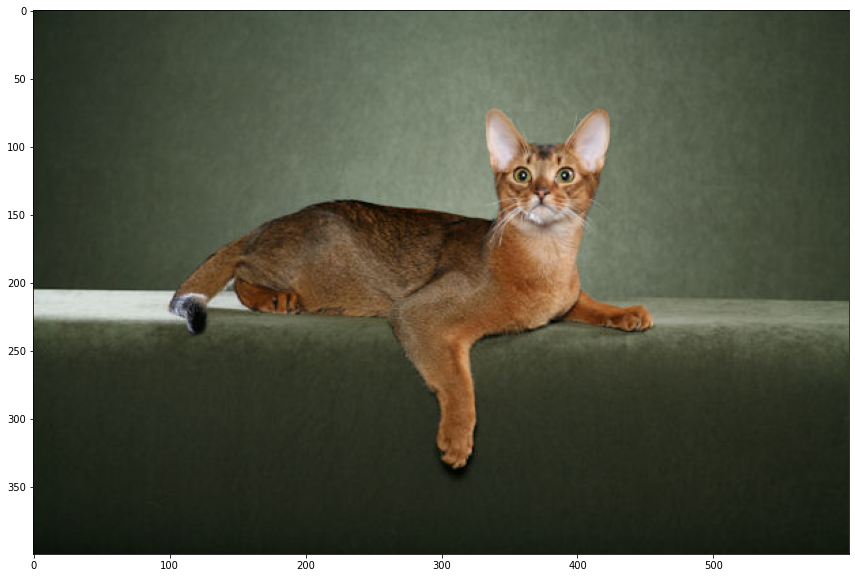

In [ ]:
# Let's take a look at the dataset image
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('./oxford_pet/images/Abyssinian_1.jpg')
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [ ]:
# Check the label of a single image
!cat ./oxford_pet/annotations/xmls/Abyssinian_1.xml

<annotation><folder>OXIIIT</folder><filename>Abyssinian_1.jpg</filename><source><database>OXFORD-IIIT Pet Dataset</database><annotation>OXIIIT</annotation><image>flickr</image></source><size><width>600</width><height>400</height><depth>3</depth></size><segmented>0</segmented><object><name>cat</name><pose>Frontal</pose><truncated>0</truncated><occluded>0</occluded><bndbox><xmin>333</xmin><ymin>72</ymin><xmax>425</xmax><ymax>158</ymax></bndbox><difficult>0</difficult></object></annotation>


[{'class_name': 'Abyssinian', 'bndbox_coor': (333, 72, 425, 158)}]


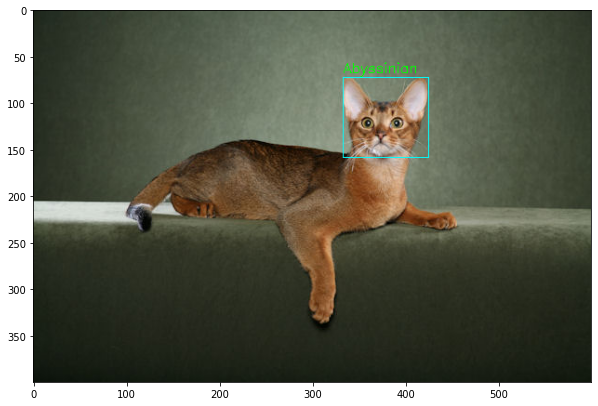

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
img_dir = "./oxford_pet/images/"
xml_file = "./oxford_pet/annotations/xmls/Abyssinian_1.xml"

tree = ET.parse(xml_file)
root = tree.getroot()

img_path = root.find('filename').text
img_full_path = os.path.join(img_dir, img_path)
img = cv2.imread(img_full_path)
dst = img.copy()

objects = root.findall('object')
object_list = []

for obj in objects:
  box = obj.find("bndbox")
  x1 = int(box.find('xmin').text)
  y1 = int(box.find('ymin').text)
  x2 = int(box.find('xmax').text)
  y2 = int(box.find('ymax').text)

  bndbox_coor = (x1, y1, x2, y2)
  class_name = img_path[:img_path.rfind('_')]

  cv2.rectangle(dst, (x1, y1), (x2, y2), color=(255, 255, 0), thickness=1)
  cv2.putText(dst, class_name, (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), thickness=1 )

  object_dict = {'class_name' : class_name, 'bndbox_coor' : bndbox_coor}
  object_list.append(object_dict)

print(object_list)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

Annotation 파일 관련

In [ ]:
import pandas as pd
pet_df = pd.read_csv('./oxford_pet/annotations/trainval.txt', sep=' ', header=None,
                     names=["image_name", "class_id", "dummy1", "dummy2" ])
pet_df

,image_name,class_id,dummy1,dummy2
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1
...,...,...,...,...
3675,yorkshire_terrier_187,37,2,25
3676,yorkshire_terrier_188,37,2,25
3677,yorkshire_terrier_189,37,2,25
3678,yorkshire_terrier_18,37,2,25


In [ ]:
pet_df['class_id'].value_counts()

In [ ]:
pet_df['class_name'] = pet_df['image_name'].apply(lambda x:x[:x.rfind('_')])
pet_df.head()

,image_name,class_id,dummy1,dummy2,class_name
0,Abyssinian_100,1,1,1,Abyssinian
1,Abyssinian_101,1,1,1,Abyssinian
2,Abyssinian_102,1,1,1,Abyssinian
3,Abyssinian_103,1,1,1,Abyssinian
4,Abyssinian_104,1,1,1,Abyssinian


In [ ]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(pet_df, test_size=0.1, stratify=pet_df['class_id'], random_state=42)

In [ ]:
print(train_df['class_id'].value_counts(), val_df['class_id'].value_counts())

In [ ]:
train_df = train_df.sort_values(by='image_name')
val_df = val_df.sort_values(by='image_name')

In [ ]:
# ann_file로 주어지는 메타파일은 가급적이면 소스데이터의 가장 상단 디렉토리에 저장하는 것이 바람직. 
train_df['image_name'].to_csv('./oxford_pet/train.txt', sep=' ', header=False, index=False)
val_df['image_name'].to_csv('./oxford_pet/val.txt', sep=' ', header=False, index=False)

In [ ]:
pet_classes_list = pet_df['class_name'].unique().tolist()
print(pet_classes_list)

['Abyssinian', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'Bengal', 'Birman', 'Bombay', 'boxer', 'British_Shorthair', 'chihuahua', 'Egyptian_Mau', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'Maine_Coon', 'miniature_pinscher', 'newfoundland', 'Persian', 'pomeranian', 'pug', 'Ragdoll', 'Russian_Blue', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'Siamese', 'Sphynx', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


### Oxford Pet Dataset을 Middle Format으로 변환하기

```
[
    {
        'filename': 'a.jpg',
        'width': 1280,
        'height': 720,
        'ann': {
            'bboxes': <np.ndarray> (n, 4) in (x1, y1, x2, y2) order,
            'labels': <np.ndarray> (n, ),
            'bboxes_ignore': <np.ndarray> (k, 4), (optional field)
            'labels_ignore': <np.ndarray> (k, 4) (optional field)
        }
    },
    ...
]
```

- github의 mmdet/datasets 디렉토리 아래 [custom.py](https://github.com/open-mmlab/mmdetection/blob/master/mmdet/datasets/custom.py)에 CustomDataset 클래스 정의
- 새로 정의한 데이터셋이 CustomDataset을 상속받으므로 부모 클래스의 __init__()함수 적용
- 이 클래스 객체를 생성하는 것은 MMDetection Framework 내부에서 하며 이 때 Config에서 설정한 Dataset 관련 내용(이미지, 라벨 등이 위치한 디렉토리)들이 __init__()을 통해 설정되어 있음

In [ ]:
def get_bboxes(anno_xml_path, filename):
  tree = ET.parse(anno_xml_path)
  root = tree.getroot()

  objects = root.findall('object')
  object_list = []

  bbox_names = []
  bboxes = []

  for obj in objects:

    bbox_name = filename[:filename.rfind('_')]

    box = obj.find("bndbox")
    x1 = int(box.find('xmin').text)
    y1 = int(box.find('ymin').text)
    x2 = int(box.find('xmax').text)
    y2 = int(box.find('ymax').text)

    bbox_names.append(bbox_name)
    bboxes.append([x1, y1, x2, y2])
  return bbox_names, bboxes

In [ ]:
import copy
import os.path as osp

import mmcv
import numpy as np

from mmdet.datasets.builder import DATASETS
from mmdet.datasets.custom import CustomDataset

@DATASETS.register_module(force=True) # 데코레이터를 통해 CustomDataset(OxfordPetDataset)을 MMDetection FWK에 등록, 재등록 실패시 (force=True)
class OxfordPetDataset(CustomDataset):

    pet_classes = pet_df["class_name"].unique().tolist()
    CLASSES = pet_classes
    # 생성자 함수 생성(디버깅용)
    # def __init__(self, data_root, ann_file, img_prefix):
    #     self.data_root = data_root
    #     self.ann_file = osp.join(data_root, ann_file)
    #     self.img_prefix = osp.join(data_root, img_prefix)
      
    #     self.data_infos = self.load_annotations(self.ann_file)    

    def load_annotations(self, ann_file):
        # self.ann_file : ./oxford_pet/train.txt
        # self.img_prefix : ./oxford_pet/images/

        cat2label = {k: i for i, k in enumerate(self.CLASSES)}
        # load image list from file
        image_list = mmcv.list_from_file(self.ann_file)
    
        data_infos = []
        # convert annotations to middle format
        for image_id in image_list:
            filename = f'{self.img_prefix}/{image_id}.jpg'
            image = mmcv.imread(filename)
            height, width = image.shape[:2]
    
            data_info = dict(filename=f'{image_id}.jpg', width=width, height=height)
    
            # load annotations
            label_prefix = self.img_prefix.replace('images', 'annotations')
            anno_xml_path = osp.join(label_prefix, 'xmls/' + str(image_id) + '.xml')
    
            if not os.path.exists(anno_xml_path):
              continue
 
            bbox_names, bboxes = get_bboxes(anno_xml_path, str(image_id) + '.xml')
    
            gt_bboxes = []
            gt_labels = []
            gt_bboxes_ignore = []
            gt_labels_ignore = []
    
            # filter 'DontCare'
            for bbox_name, bbox in zip(bbox_names, bboxes):
                if bbox_name in cat2label:
                    gt_labels.append(cat2label[bbox_name])
                    gt_bboxes.append(bbox)
                else:
                    gt_labels_ignore.append(-1)
                    gt_bboxes_ignore.append(bbox)

            data_anno = dict(
                bboxes=np.array(gt_bboxes, dtype=np.float32).reshape(-1, 4),
                labels=np.array(gt_labels, dtype=np.long),
                bboxes_ignore=np.array(gt_bboxes_ignore,
                                       dtype=np.float32).reshape(-1, 4),
                labels_ignore=np.array(gt_labels_ignore, dtype=np.long))

            data_info.update(ann=data_anno)
            data_infos.append(data_info)

        return data_infos

In [ ]:
# dataset 잘 만들었는지 확인용
# train_ds = OxfordPetDataset(data_root='./data', ann_file='train.txt', img_prefix='images')
# print(train_ds.data_infos[:10])

### Config 파일 수정하기
- 아래 주어진 config 파일은 COCO dataset 기준으로 Faster R-CNN 을 훈련 시키는 설정이므로 Oxford Pet Dataset 에 맞게 수정해야 함

In [ ]:
from mmcv import Config
cfg = Config.fromfile('./configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py')
print(f'Config:\n{cfg.pretty_text}')

### Pretrained 모델 다운로드하기

In [ ]:
# We download the pre-trained checkpoints for inference and finetuning.
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth \
      -O checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

--2022-12-21 11:29:06--  https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.246.48.204, 47.246.48.207, 47.246.48.205, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|47.246.48.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: ‘checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’

checkpoints/faster_ 100%[===================>] 159.54M  91.1MB/s    in 1.8s    

2022-12-21 11:29:08 (91.1 MB/s) - ‘checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’ saved [167287506/167287506]



In [ ]:
# 학습 수행후 모델 checkpoint 저장할 공간 연결
# !mkdir /content/drive/MyDrive/pet_log

In [ ]:
from mmdet.apis import set_random_seed

# Modify dataset type and path
cfg.dataset_type = 'OxfordPetDataset'
cfg.data_root = 'oxford_pet/'

cfg.data.test.type = 'OxfordPetDataset'
cfg.data.test.data_root = 'oxford_pet/'
cfg.data.test.ann_file = 'train.txt'
cfg.data.test.img_prefix = 'images'

cfg.data.train.type = 'OxfordPetDataset'
cfg.data.train.data_root = 'oxford_pet/'
cfg.data.train.ann_file = 'train.txt'
cfg.data.train.img_prefix = 'images'

cfg.data.val.type = 'OxfordPetDataset'
cfg.data.val.data_root = 'oxford_pet/'
cfg.data.val.ann_file = 'val.txt'
cfg.data.val.img_prefix = 'images'

# modify num classes of the model in box head
cfg.model.roi_head.bbox_head.num_classes = 37
# If we need to finetune a model based on a pre-trained detector, we need to
# use load_from to set the path of checkpoints.
cfg.load_from = 'checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# Set up working dir to save files and logs.
cfg.work_dir = '/content/drive/MyDrive/pet_log'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# max epochs 12 -> 5
cfg.runner.max_epochs = 5

# 학습 시 Batch size 설정(단일 GPU 별 Batch size로 설정됨)
# samples_per_gpu 2 -> 4
cfg.data.samples_per_gpu = 4

# Change the evaluation metric since we use customized dataset.
cfg.evaluation.metric = 'mAP'
# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 5 #12
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 5 #12

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.device = 'cuda'
cfg.gpu_ids = range(1)

# We can also use tensorboard to log the training process
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='TensorboardLoggerHook')]


# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

### Config에서 설정한 OxfordPet Dataset 적용
- build_dataset() 가 호출될 때 MMDetection Framework에서 OxfordPetDataset 클래스 객체를 생성
- load_annotations() 함수가 호출될 때 self.ann_file, self.data_root, self.img_prefix 값이 Config에서 설정한 파일들로 적용되어 있음

In [ ]:
from mmdet.datasets import build_dataset

# Build dataset
datasets = [build_dataset(cfg.data.train)]

<ipython-input-54-471bfbb22671>:65: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels=np.array(gt_labels, dtype=np.long),
<ipython-input-54-471bfbb22671>:68: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `n

In [ ]:
datasets

[
 OxfordPetDataset Train dataset with number of images 3303, and instance counts: 
 +-----------------------+-------+-------------------------+-------+-------------------------------+-------+---------------------+-------+---------------------------------+-------+
 | category              | count | category                | count | category                      | count | category            | count | category                        | count |
 +-----------------------+-------+-------------------------+-------+-------------------------------+-------+---------------------+-------+---------------------------------+-------+
 | 0 [Abyssinian]        | 89    | 1 [american_bulldog]    | 90    | 2 [american_pit_bull_terrier] | 90    | 3 [basset_hound]    | 90    | 4 [beagle]                      | 90    |
 | 5 [Bengal]            | 89    | 6 [Birman]              | 90    | 7 [Bombay]                    | 87    | 8 [boxer]           | 90    | 9 [British_Shorthair]           | 90    |
 | 10 [chih

### Config에서 설정한 모델 적용

In [ ]:
from mmdet.models import build_detector

# Build the detector
model = build_detector(cfg.model)
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

### 학습 수행

In [ ]:
from mmdet.apis import train_detector

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True) # validate=True : validation 데이터로 evaluation

2022-12-20 12:52:41,918 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.
<ipython-input-24-471bfbb22671>:65: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels=np.array(gt_labels, dtype=np.long),
<ipython-input-24-471bfbb22671>:68: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 368/368, 8.6 task/s, elapsed: 43s, ETA:     0s
---------------iou_thr: 0.5---------------


2022-12-20 14:08:46,250 - mmdet - INFO - 
+----------------------------+-----+------+--------+-------+
| class                      | gts | dets | recall | ap    |
+----------------------------+-----+------+--------+-------+
| Abyssinian                 | 10  | 70   | 1.000  | 0.713 |
| american_bulldog           | 10  | 46   | 1.000  | 0.897 |
| american_pit_bull_terrier  | 10  | 55   | 0.900  | 0.622 |
| basset_hound               | 10  | 71   | 1.000  | 0.922 |
| beagle                     | 10  | 71   | 0.900  | 0.683 |
| Bengal                     | 10  | 94   | 0.800  | 0.411 |
| Birman                     | 10  | 35   | 0.900  | 0.829 |
| Bombay                     | 9   | 38   | 1.000  | 1.000 |
| boxer                      | 10  | 60   | 1.000  | 0.812 |
| British_Shorthair          | 10  | 25   | 1.000  | 0.967 |
| chihuahua                  | 10  | 50   | 0.900  | 0.890 |
| Egyptian_Mau               | 9   | 63   | 1.000  | 0.887 |
| english_cocker_spaniel     | 10  | 52   |

### 로그 확인하기

In [ ]:
# load tensorboard in colab
%load_ext tensorboard

# see curves in tensorboard
%tensorboard --logdir /content/drive/MyDrive/pet_log

### 학습된 모델로 예측하기

In [ ]:
# from mmdet.apis import show_result_pyplot

In [ ]:
# img = mmcv.imread('kitti_tiny/training/image_2/000068.jpeg')

# model.cfg = cfg
# result = inference_detector(model, img)
# show_result_pyplot(model, img, result)

load checkpoint from local path: /content/drive/MyDrive/pet_log/epoch_12.pth


/content/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


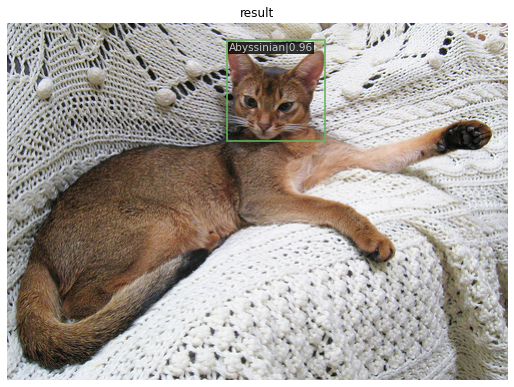

In [ ]:
from mmdet.apis import show_result_pyplot

checkpoint_file = '/content/drive/MyDrive/pet_log/epoch_12.pth'

# checkpoint 저장된 model 파일을 이용하여 모델을 생성, 이때 Config는 위에서 update된 config 사용. 
model_ckpt = init_detector(cfg, checkpoint_file, device='cuda:0')
img = mmcv.imread('./oxford_pet/images/Abyssinian_88.jpg') # BGR Image 사용 
#model_ckpt.cfg = cfg

result = inference_detector(model_ckpt, img)
show_result_pyplot(model_ckpt, img, result, score_thr=0.3)

In [ ]:
val_df

In [ ]:
Abysn_df = val_df[val_df['class_name'] == 'Abyssinian']
Abysn_img_paths = './oxford_pet/images/' + Abysn_df['image_name'] + '.jpg'
Abysn_img_paths.values

In [ ]:
Abysn_imgs = [mmcv.imread(x) for x in Abysn_img_paths.values]

In [ ]:
PET_CLASSES = pet_df['class_name'].unique().tolist()
labels_to_names = {i:k for i, k in enumerate(PET_CLASSES)}

In [ ]:
for i in range(len(Abysn_imgs)):
  results = inference_detector(model_ckpt, Abysn_imgs[i])
  for result_ind, result in enumerate(results):
    if result.size == 0:
      continue
    print(labels_to_names[result_ind], result[0][4])
  show_result_pyplot(model_ckpt, Abysn_imgs[i], results, score_thr=0.6)